In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = fetch_california_housing()

In [8]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [9]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [10]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [11]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["price"] = data.target

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0.5, 1.0, 'Distribution of MedInc')

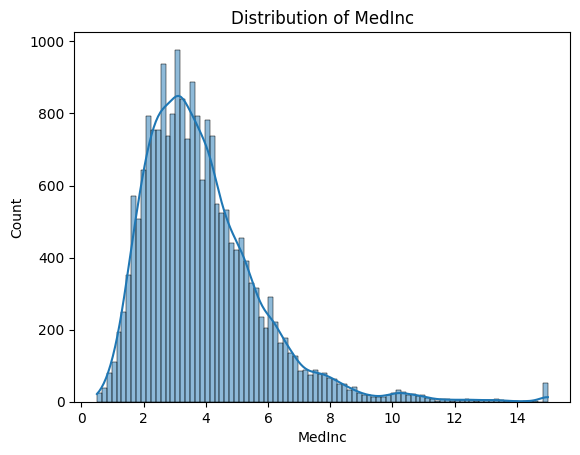

In [15]:
sns.histplot(df, x="MedInc", kde=True)
plt.title("Distribution of MedInc")

<Axes: >

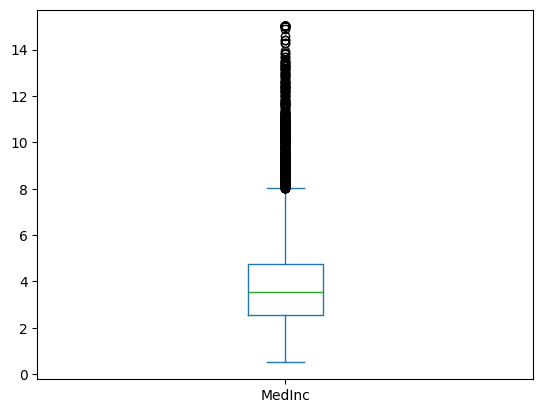

In [16]:
df.MedInc.plot.box()

In [17]:
df["MedInc"].quantile(0.97)

8.160844999999997

In [18]:
df[df["MedInc"]<=8]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
df.shape

(20640, 9)

In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

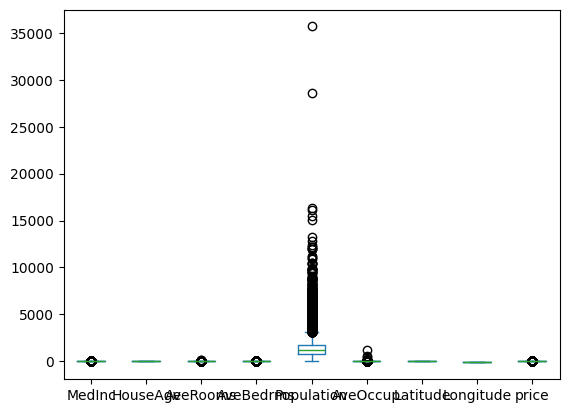

In [21]:
df.plot.box()

<Axes: >

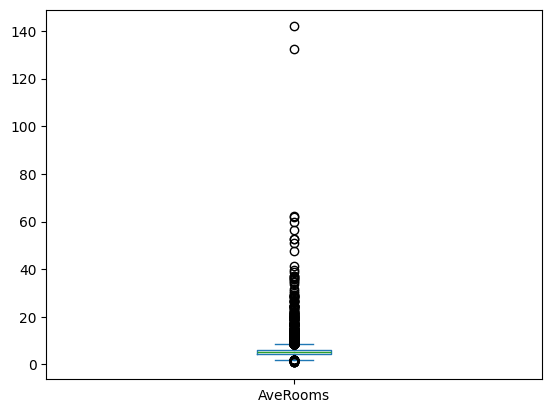

In [22]:
df["AveRooms"].plot.box()

In [23]:
df["AveRooms"].quantile([0.1, 0.9, 0.95, 0.97, 0.99])

0.10     3.790884
0.90     6.961188
0.95     7.640247
0.97     8.154725
0.99    10.357033
Name: AveRooms, dtype: float64

<Axes: >

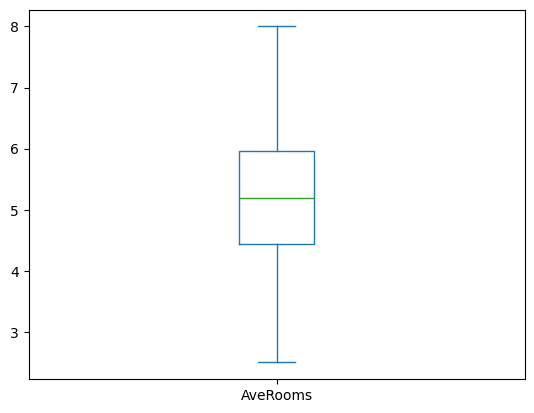

In [24]:
df[(df["AveRooms"]>=2.5)&(df["AveRooms"]<=8)]["AveRooms"].plot.box()

In [25]:
df= df[(df["AveRooms"]>=2.5)&(df["AveRooms"]<=8)]

In [26]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,19752.000000,19752.000000,19752.000000,19752.000000,19752.000000,19752.000000,19752.000000,19752.000000,19752.000000
mean,3.780578,28.842548,5.217884,1.061122,1438.843358,3.039025,35.628367,-119.583424,2.031914
std,1.698865,12.478390,1.090483,0.108415,1130.891974,9.869602,2.131264,2.000994,1.116506
min,0.499900,1.000000,2.500000,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.563850,18.000000,4.432037,1.004899,802.750000,2.429911,33.930000,-121.800000,1.188000
50%,3.517900,29.000000,5.185962,1.046963,1178.000000,2.817415,34.260000,-118.500000,1.782000
75%,4.677950,37.000000,5.954224,1.095652,1733.250000,3.285714,37.710000,-118.020000,2.601000
max,15.000100,52.000000,8.000000,3.099338,35682.000000,1243.333333,41.950000,-114.550000,5.000010


<Axes: >

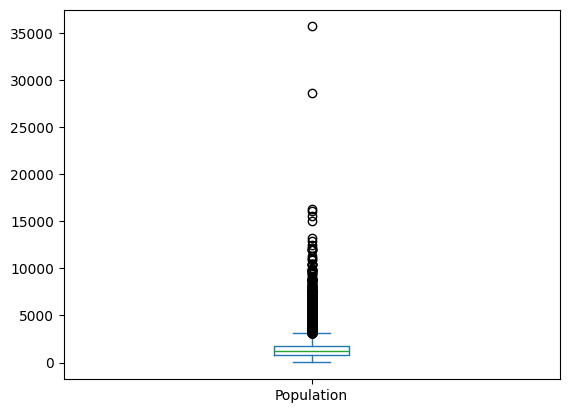

In [27]:
df["Population"].plot.box()

In [28]:
df["Population"].quantile(0.9)

2568.0

<Axes: >

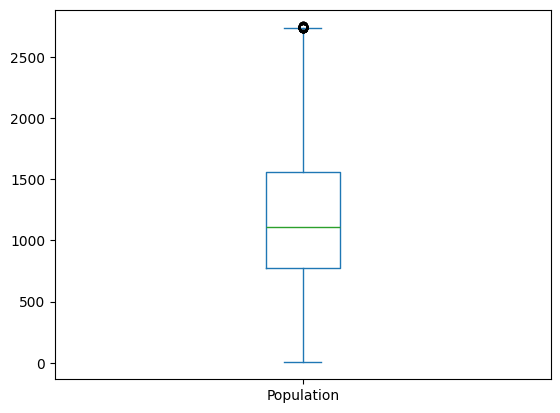

In [29]:
df[df["Population"]<2750]["Population"].plot.box()

In [30]:
df = df[df["Population"]<2750]

In [31]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,18098.000000,18098.000000,18098.000000,18098.000000,18098.000000,18098.000000,18098.000000,18098.000000,18098.000000
mean,3.770300,29.766328,5.220824,1.060766,1193.000442,2.909279,35.668100,-119.623028,2.037092
std,1.709409,12.270831,1.078730,0.111569,576.284276,1.037069,2.144274,2.004429,1.134376
min,0.499900,1.000000,2.500000,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.551025,20.000000,4.445557,1.002442,773.000000,2.413147,33.940000,-121.830000,1.164000
50%,3.508300,30.000000,5.186151,1.046154,1112.000000,2.794439,34.280000,-118.560000,1.782000
75%,4.663500,38.000000,5.949860,1.096120,1558.000000,3.254087,37.730000,-118.040000,2.621000
max,15.000100,52.000000,8.000000,3.099338,2749.000000,63.750000,41.950000,-114.550000,5.000010


<Axes: >

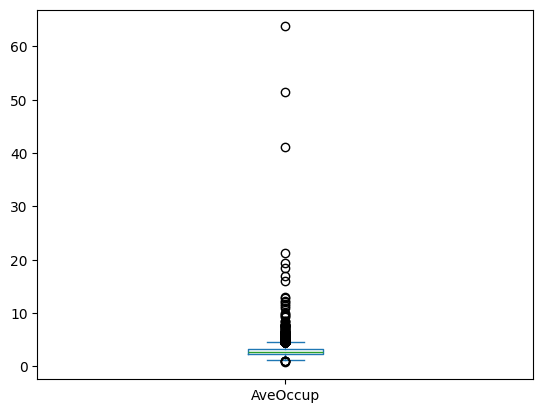

In [32]:
df["AveOccup"].plot.box()

<Axes: >

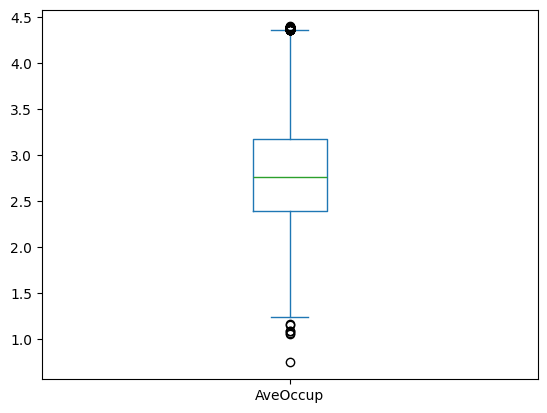

In [33]:
df[df["AveOccup"]<4.4]["AveOccup"].plot.box()

In [34]:
df = df[df["AveOccup"]<4.4]

In [35]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


In [36]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000
mean,3.807197,29.675049,5.253688,1.061012,1185.086719,2.806981,35.710185,-119.660796,2.063731
std,1.716315,12.344530,1.071807,0.111253,572.099812,0.606888,2.157236,2.015808,1.142670
min,0.499900,1.000000,2.500000,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.576900,19.000000,4.491870,1.002429,769.000000,2.396306,33.940000,-121.870000,1.179000
50%,3.541700,30.000000,5.223838,1.046256,1101.500000,2.764243,34.410000,-118.770000,1.825000
75%,4.709350,38.000000,5.975283,1.095967,1543.000000,3.181818,37.740000,-118.040000,2.659000
max,15.000100,52.000000,8.000000,3.099338,2749.000000,4.399209,41.950000,-114.550000,5.000010


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scalar = StandardScaler()

In [39]:
X = scalar.fit_transform(df.drop("price", axis=1))

In [40]:
X

array([[ 2.63246082e+00,  9.17432855e-01,  1.61455255e+00, ...,
        -4.14298410e-01,  1.00585968e+00, -1.27456506e+00],
       [ 2.61859350e+00, -7.02764615e-01,  9.18521255e-01, ...,
        -1.14874451e+00,  9.96588297e-01, -1.26960413e+00],
       [ 1.06970771e+00,  1.80854146e+00,  5.25915582e-01, ...,
        -4.26838728e-01,  9.91952603e-01, -1.28448693e+00],
       ...,
       [-1.22777999e+00, -1.02680411e+00, -4.49207309e-02, ...,
        -7.93160826e-01,  1.72439224e+00, -7.73510792e-01],
       [-1.13035920e+00, -9.45794235e-01,  7.07472124e-02, ...,
        -1.12671784e+00,  1.72439224e+00, -8.23120126e-01],
       [-8.26560134e-01, -1.10781398e+00,  9.60347611e-04, ...,
        -3.13081479e-01,  1.69657808e+00, -7.83432659e-01]])

In [41]:
y = df.price

In [42]:
y

0        4.526
1        3.585
3        3.413
4        3.422
5        2.697
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 17378, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.8, random_state=234)

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
model = DecisionTreeRegressor()

In [47]:
model.fit(X_tr, y_tr)

DecisionTreeRegressor()

In [48]:
model.score(X_tr, y_tr)

1.0

In [49]:
y_pred = model.predict(X_te)

In [50]:
r2_score(y_te, y_pred)

0.5614642298966548

In [51]:
from sklearn.model_selection import GridSearchCV

In [53]:
DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    max_leaf_nodes=None,
)

DecisionTreeRegressor()

In [54]:
params = {
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],
    "max_features":list(range(2,8)),
    "min_samples_split":[2, 3, 4, 5, 6],
}

In [55]:
dtr = DecisionTreeRegressor()

In [56]:
gscv = GridSearchCV(dtr, param_grid=params, n_jobs=-1, cv=10, verbose=1)

In [57]:
gscv.fit(X_tr, y_tr)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [58]:
gscv.best_params_

{'max_depth': 8, 'max_features': 5, 'min_samples_split': 2}

In [59]:
model2 = DecisionTreeRegressor( max_depth=10, max_features=4)

In [60]:
model2.fit(X_tr, y_tr)

DecisionTreeRegressor(max_depth=10, max_features=4)

In [63]:
y_pred2 = model2.predict(X_te)

In [73]:
R2= r2_score(y_te, y_pred2)

In [74]:
n=len(X_te)

In [75]:
n

13903

In [76]:
n, k = X_te.shape[0], X_te.shape[1]

In [77]:
n, k

(13903, 8)

In [78]:
adj_R2= 1-(((1 - R2)*(n-1))/(n-k-1))

In [79]:
adj_R2

0.5832985338973506

In [80]:
R2

0.5835383275765926